In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, Dropout

import numpy as np
import matplotlib.pyplot as plt


In [6]:
seed_value = 42
tf.random.set_seed(seed_value)

In [7]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.IEXL08_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.IEXL08_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.IEXL08_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [8]:
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [6]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_e

In [9]:
train_dataset = dataset['train']
test_dataset = dataset['test']

print(len(train_dataset),"  ", len(test_dataset))

25000    25000


In [9]:
for input, label in train_dataset:
  print(input)
  print(label)
  break


tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)


In [10]:
#훈련데이터셋 분리
train_sentences = []
train_label = []

for sent, label in train_dataset:
  train_sentences.append(str(sent.numpy()))
  train_label.append(label.numpy())

In [11]:
#테스트데이터 셋 분리
test_sentences = []
test_label = []

for sent, label in test_dataset:
  test_sentences.append(str(sent.numpy()))
  test_label.append(label.numpy())

In [15]:
print(train_sentences[0])
print(train_label[0])
print(test_sentences[0])
print(test_label[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of th

In [12]:
train_label = np.array(train_label)
test_label = np.array(test_label)

print(train_label.shape)
print(test_label.shape)

(25000,)
(25000,)


In [13]:
vocab_size = 10000

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)

In [14]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)

print(train_sequences[0])

[59, 12, 14, 35, 439, 400, 18, 174, 29, 1, 9, 33, 1378, 3401, 42, 496, 1, 197, 25, 88, 156, 19, 12, 211, 340, 29, 70, 248, 213, 9, 486, 62, 70, 88, 116, 99, 24, 5740, 12, 3317, 657, 777, 12, 18, 7, 35, 406, 8228, 178, 2477, 426, 2, 92, 1253, 140, 72, 149, 55, 2, 1, 7525, 72, 229, 70, 2962, 16, 1, 2880, 1, 1, 1506, 4998, 3, 40, 3947, 119, 1608, 17, 3401, 14, 163, 19, 4, 1253, 927, 7986, 9, 4, 18, 13, 14, 4200, 5, 102, 148, 1237, 11, 240, 692, 13, 44, 25, 101, 39, 12, 7232, 1, 39, 1378, 1, 52, 409, 11, 99, 1214, 874, 145, 10]


In [15]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)

print(test_sequences[0])

[59, 44, 25, 109, 13, 97, 4115, 16, 742, 4370, 10, 14, 316, 5, 2, 593, 354, 16, 1864, 1212, 1, 16, 680, 7499, 5595, 1, 773, 6, 13, 1037, 1, 1, 439, 491, 1, 4, 1, 334, 3610, 20, 229, 3, 15, 5796, 3, 15, 1646, 15, 102, 5, 2, 3597, 101, 11, 1450, 1528, 12, 251, 235, 11, 216, 2, 377, 6429, 3, 62, 95, 11, 174, 105, 11, 1528, 180, 12, 251, 37, 6, 1144, 1, 682, 7, 4452, 1, 4, 1, 334, 7, 37, 8367, 377, 5, 1420, 1, 13, 30, 64, 28, 6, 874, 181, 17, 4, 1050, 5, 12, 224, 3, 83, 4, 353, 33, 353, 5229, 5, 10, 6, 1340, 1160, 2, 5738, 1, 3, 1, 5, 10, 175, 328, 7, 1319, 3989, 4, 798, 1946, 5, 4, 250, 2710, 158, 3, 2, 361, 31, 187, 25, 1170, 499, 610, 5, 2, 122, 2, 356, 1398, 7725, 30, 1, 881, 38, 4, 20, 39, 12, 1, 4, 1, 334, 7, 4, 20, 634, 60, 48, 214]


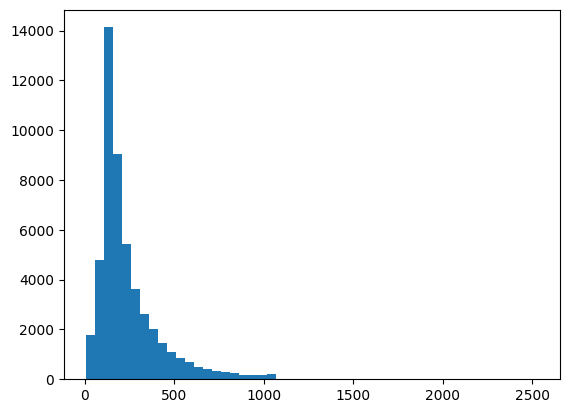

In [24]:
# 훈련 시퀀스와 테스트 시퀀스의 길이를 리스트로 변환하여 합친 후 히스토그램으로 시각화
plt.hist([len(s) for s in train_sequences] + [len(s) for s in test_sequences], bins=50);

In [16]:
max_length = 150

train_padded = pad_sequences(sequences=train_sequences,
                             maxlen=max_length,
                             padding='post',
                             truncating='post')

test_padded = pad_sequences(sequences=test_sequences,
                             maxlen=max_length,
                             padding='post',
                             truncating='post')

In [21]:
print(train_padded.shape, "  ", test_padded.shape)
print()
print(train_padded[0])
print(test_padded[0])

(25000, 150)    (25000, 150)

[  59   12   14   35  439  400   18  174   29    1    9   33 1378 3401
   42  496    1  197   25   88  156   19   12  211  340   29   70  248
  213    9  486   62   70   88  116   99   24 5740   12 3317  657  777
   12   18    7   35  406 8228  178 2477  426    2   92 1253  140   72
  149   55    2    1 7525   72  229   70 2962   16    1 2880    1    1
 1506 4998    3   40 3947  119 1608   17 3401   14  163   19    4 1253
  927 7986    9    4   18   13   14 4200    5  102  148 1237   11  240
  692   13   44   25  101   39   12 7232    1   39 1378    1   52  409
   11   99 1214  874  145   10    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]
[  59   44   25  109   13   97 4115   16  742 4370   10   14  316    5
    2  593  354   16 1864 1212    1   16  680 7499 5595    1  773    6
   13 1037    1    1  439  491    1    4    1  334 3610   20  229 

In [ ]:
# 단어 인덱스를 키로, 단어를 값으로 하는 사전 생성
# 수열을 다시 문장(텍스트)으로 변형 해 보기
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

# 시퀀스를 리뷰 텍스트로 디코딩하는 함수
def decode_review(sequence):
  # 시퀀스의 각 인덱스를 단어로 변환하여 리스트로 만들고, 이를 공백으로 연결하여 문자열로 반환
  return ' '.join([tokenizer.index_word.get(i, '<pad>') for i in sequence])

# 첫 번째 패딩된 훈련 시퀀스를 디코딩하여 출력
print(decode_review(train_padded[0]))
print()

# 첫 번째 훈련 문장 원본 출력
print(train_sentences[0])

In [17]:
model = Sequential([
    Embedding(vocab_size +1, 64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
%%time
hist = model.fit(train_padded,
                 train_label,
                 epochs=30,
                 batch_size=128,
                 validation_data=(test_padded, test_label),
                 verbose=1
                 )

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6561 - loss: 0.5880 - val_accuracy: 0.8182 - val_loss: 0.4009
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8666 - loss: 0.3134 - val_accuracy: 0.7894 - val_loss: 0.4673
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8824 - loss: 0.2847 - val_accuracy: 0.8113 - val_loss: 0.4717
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9099 - loss: 0.2263 - val_accuracy: 0.8152 - val_loss: 0.4717
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9173 - loss: 0.2127 - val_accuracy: 0.8242 - val_loss: 0.4849
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9304 - loss: 0.1821 - val_accuracy: 0.8262 - val_loss: 0.5170
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9329 - loss: 0.1759 - val_accuracy: 0.8218 - val_loss: 0.5461
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9429 - loss: 0.1509 - val_acc

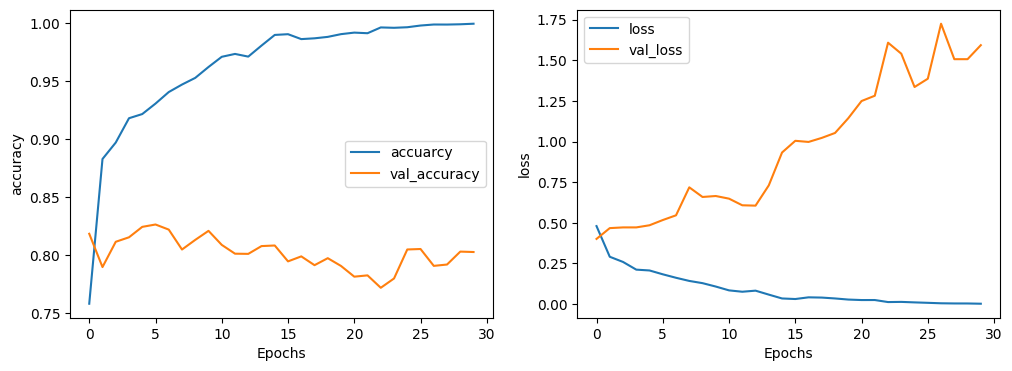

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(hist.history['accuracy'])
ax1.plot(hist.history['val_accuracy'])
ax1.set_xlabel('Epochs')
ax1.set_ylabel('accuracy')
ax1.legend(['accuarcy', 'val_accuracy'])

ax2.plot(hist.history['loss'])
ax2.plot(hist.history['val_loss'])
ax2.set_xlabel('Epochs')
ax2.set_ylabel('loss')
ax2.legend(['loss', 'val_loss'])
plt.show()

In [25]:
# sample_text = ['The movei was terrible. I would not recommend the movie']
# sample_text = ['The movei was fantastic. I would recommend the movie']
sample_text = ['The animation and graphics were out of this world']
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, padding='post', truncating='post')
sample_padded

array([[   2,  756,    3, 2888,   72,   46,    5,   12,  179,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [26]:
model.predict(sample_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.99918014]], dtype=float32)